In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the NASDAQ 100 components
page = requests.get("https://en.wikipedia.org/wiki/Nasdaq-100")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='constituents',class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
5,Amazon,AMZN,Consumer Discretionary,Broadline Retail
6,Advanced Micro Devices Inc.,AMD,Information Technology,Semiconductors
7,American Electric Power,AEP,Utilities,Electric Utilities
8,Amgen,AMGN,Health Care,Biotechnology
9,Analog Devices,ADI,Information Technology,Semiconductors


In [4]:
wiki.head(80)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
75,Onsemi,ON,Information Technology,Semiconductors
76,Paccar,PCAR,Industrials,Construction Machinery & Heavy Transportation ...
77,Palo Alto Networks,PANW,Information Technology,Systems Software
78,Paychex,PAYX,Industrials,Human Resource & Employment Services


In [5]:
# Get the data for the stock 
index_list = wiki['Ticker'].tolist()
index_list.append('^NDX')

In [6]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/102 [00:00<?, ?it/s]

In [7]:
# Configuration of different parameters of the notebook
ticker = '^NDX'
year = '2024'

In [8]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000
1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000
1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000
1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000


In [9]:
# Check DataFrame tail
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-01,18280.820312,18391.580078,18211.279297,18293.199219,18293.199219,4798390000
2024-04-02,18076.429688,18135.570312,18002.269531,18121.779297,18121.779297,4710280000
2024-04-03,18054.439453,18238.669922,18045.419922,18160.189453,18160.189453,5151500000
2024-04-04,18331.019531,18362.289062,17875.750000,17878.779297,17878.779297,5368700000
2024-04-05,17940.279297,18202.960938,17912.859375,18108.460938,18108.460938,4578130000
2024-04-08,18130.439453,18178.660156,18050.689453,18100.189453,18100.189453,4386700000
2024-04-09,18188.869141,18210.019531,17973.070312,18169.900391,18169.900391,4869190000
2024-04-10,17957.960938,18040.830078,17932.419922,18011.660156,18011.660156,5308250000
2024-04-11,18085.109375,18337.150391,17998.250000,18307.980469,18307.980469,4714750000


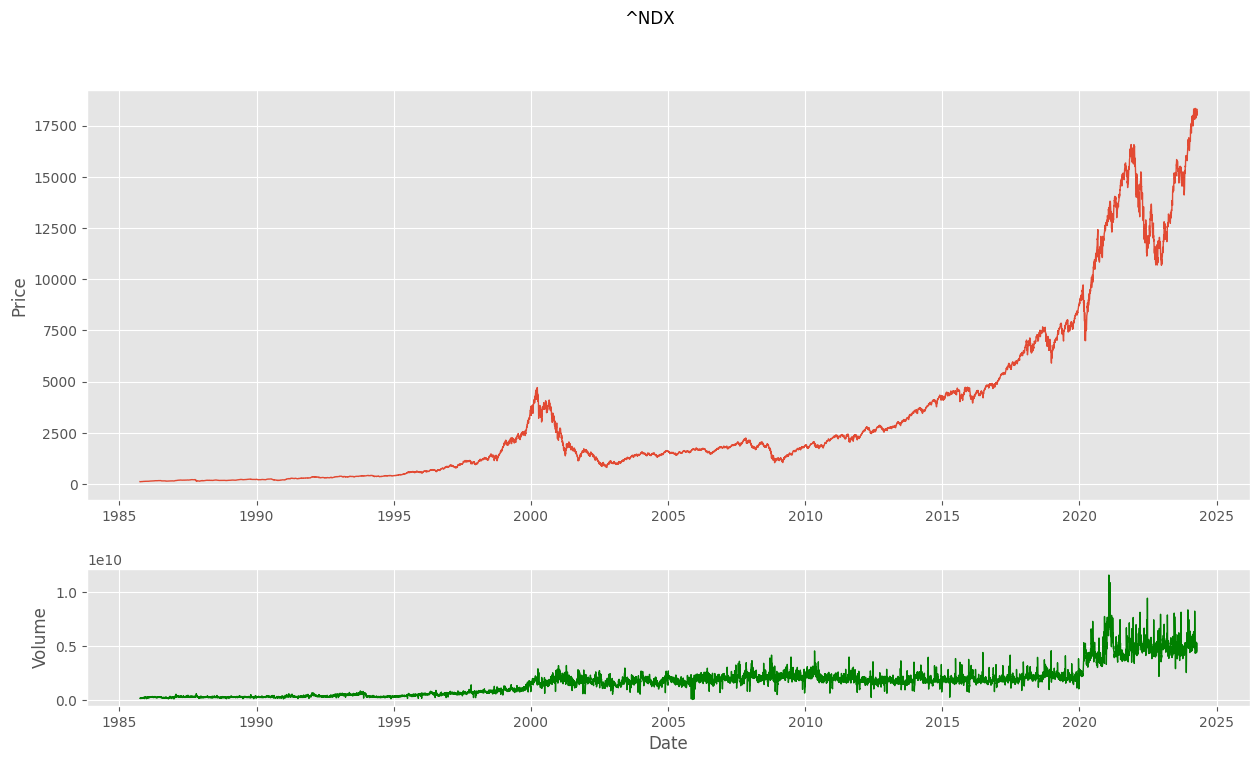

In [10]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [11]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [12]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

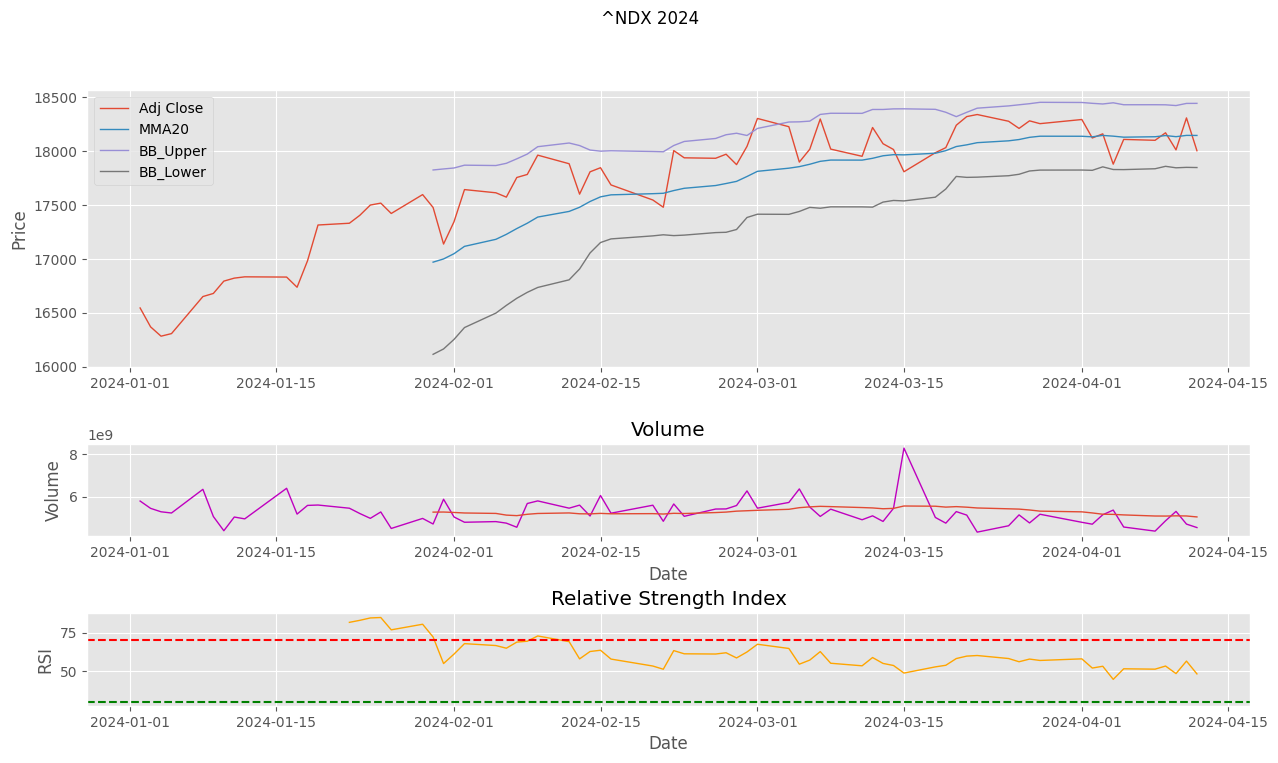

In [13]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [14]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [15]:
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-04-01,18280.820312,18391.580078,18211.279297,18293.199219,18293.199219,4798390000,18137.707813,18451.233198,17824.182427,57.832749,0.210958
2024-04-02,18076.429688,18135.570312,18002.269531,18121.779297,18121.779297,4710280000,18132.472754,18443.379767,17821.565741,51.833662,-0.937069
2024-04-03,18054.439453,18238.669922,18045.419922,18160.189453,18160.189453,5151500000,18145.588770,18437.343673,17853.833867,53.009879,0.211956
2024-04-04,18331.019531,18362.289062,17875.750000,17878.779297,17878.779297,5368700000,18138.649219,18448.307107,17828.991330,44.446260,-1.549599
2024-04-05,17940.279297,18202.960938,17912.859375,18108.460938,18108.460938,4578130000,18129.172754,18430.226153,17828.119355,51.353761,1.284661
2024-04-08,18130.439453,18178.660156,18050.689453,18100.189453,18100.189453,4386700000,18133.259766,18430.383310,17836.136222,51.107309,-0.045677
2024-04-09,18188.869141,18210.019531,17973.070312,18169.900391,18169.900391,4869190000,18144.170312,18429.619418,17858.721207,53.148060,0.385139
2024-04-10,17957.960938,18040.830078,17932.419922,18011.660156,18011.660156,5308250000,18133.797852,18422.656737,17844.938966,48.227223,-0.870892
2024-04-11,18085.109375,18337.150391,17998.250000,18307.980469,18307.980469,4714750000,18145.773340,18442.556419,17848.990261,56.373057,1.645158


  0%|          | 0/102 [00:00<?, ?it/s]

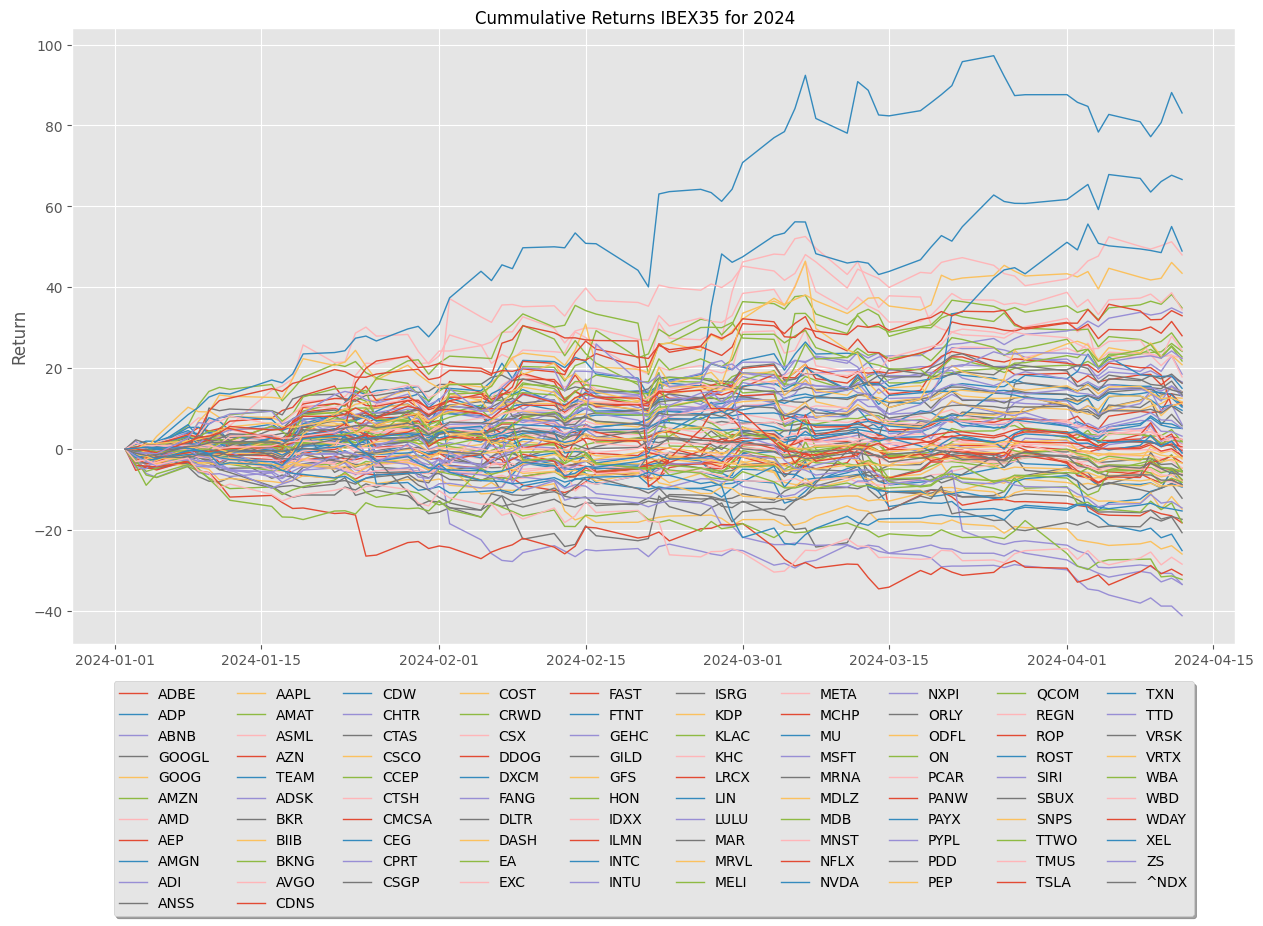

In [16]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [17]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/102 [00:00<?, ?it/s]

In [18]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/102 [00:00<?, ?it/s]

,Ticker,Company,Date,Cummulative_Return
0,NVDA,Nvidia,2024-04-12,83.088637
1,CEG,Constellation Energy,2024-04-12,66.634851
2,MU,Micron Technology,2024-04-12,48.941306
3,META,Meta Platforms,2024-04-12,47.980919
4,DASH,DoorDash,2024-04-12,43.458435
...,...,...,...,...
96,TSLA,"Tesla, Inc.",2024-04-12,-31.144834
97,WBA,Walgreens Boots Alliance,2024-04-12,-32.260888
98,CHTR,Charter Communications,2024-04-12,-33.462748
99,LULU,Lululemon,2024-04-12,-33.489651


In [19]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Company,Date,Cummulative_Return
0,NVDA,Nvidia,2024-04-12,83.088637
1,CEG,Constellation Energy,2024-04-12,66.634851
2,MU,Micron Technology,2024-04-12,48.941306
3,META,Meta Platforms,2024-04-12,47.980919
4,DASH,DoorDash,2024-04-12,43.458435
5,AMAT,Applied Materials,2024-04-12,34.878713
6,ASML,ASML Holding,2024-04-12,34.397604
7,FANG,Diamondback Energy,2024-04-12,33.641286
8,NFLX,Netflix,2024-04-12,32.941306
9,LRCX,Lam Research,2024-04-12,27.999454


In [20]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).tail(30)

,Ticker,Company,Date,Cummulative_Return
71,MNST,Monster Beverage,2024-04-12,-6.110261
72,VRSK,Verisk,2024-04-12,-6.337525
73,MRNA,Moderna,2024-04-12,-6.542223
74,CTSH,Cognizant,2024-04-12,-6.549269
75,TTWO,Take-Two Interactive,2024-04-12,-7.528564
76,ILMN,"Illumina, Inc.",2024-04-12,-7.659328
77,KDP,Keurig Dr Pepper,2024-04-12,-8.195911
78,MDB,MongoDB Inc.,2024-04-12,-8.243635
79,SBUX,Starbucks,2024-04-12,-8.795856
80,TEAM,Atlassian,2024-04-12,-8.885163
